## Regresión lineal simple en Python (con 1 variable)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [3]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [4]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se verea si existe alguna correlación lineal entre la cantidad de palabras del texto y la cantidad de shares obtenidos.

Primeri visualizamos los datos:

C:\Users\osciv\AppData\Local\Temp/ipykernel_17384/555081464.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Title','url', 'Elapsed days'],1).hist()


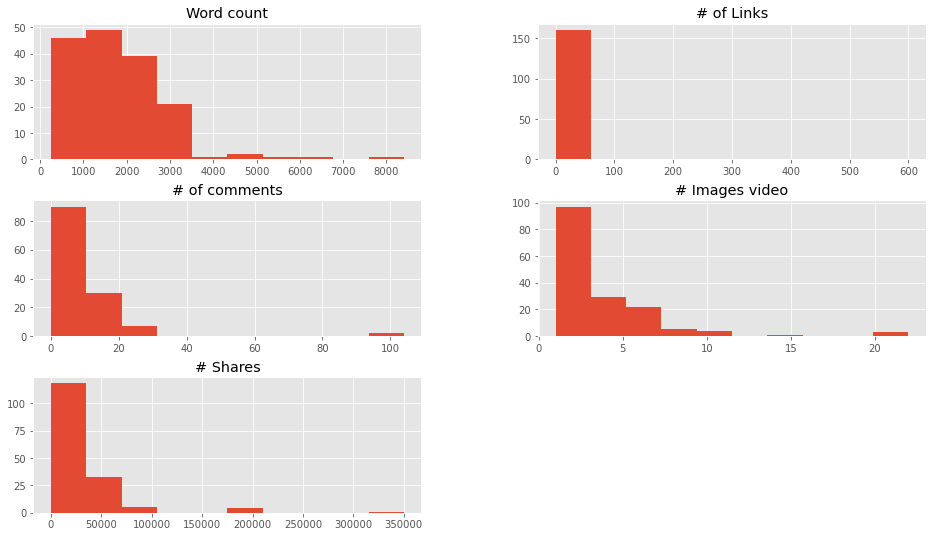

In [5]:
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

Se filtran los datos

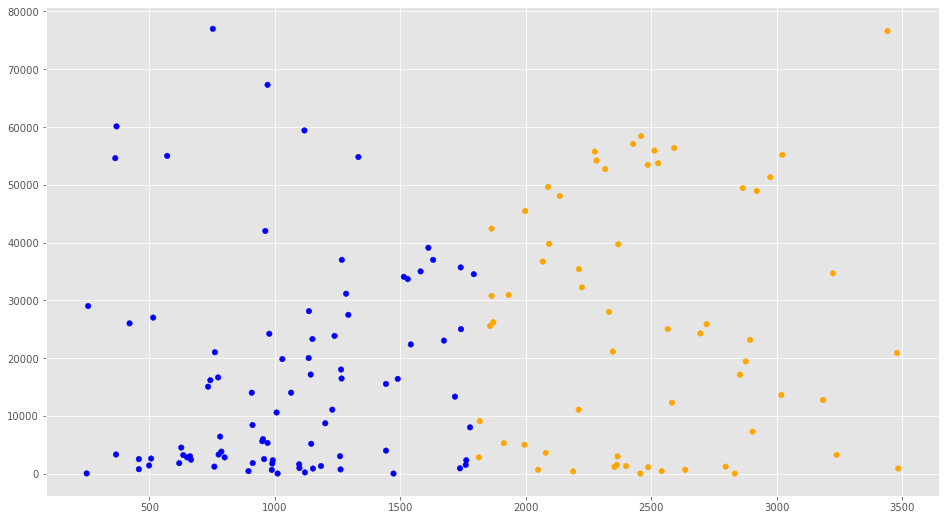

In [6]:
datos_filtrados = data[(data['Word count']<=3500)&(data['# Shares']<=80000)]

colores = ['orange','blue']
tamanios = [30,60]

f1 = datos_filtrados['Word count'].values
f2 = datos_filtrados['# Shares'].values

#Se pintan de colores los puntos por encima de la media de Cantidad de Palabras
asignar = []
for i, row in datos_filtrados.iterrows():
    if(row['Word count']>1808):
         asignar.append(colores[0])
    else: 
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### Regresión Lineal con Python y SKLearn

In [7]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = datos_filtrados[["Word count"]]
X_train = np.array(dataX)
y_train = datos_filtrados['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Hacemos las predicciones 
y_pred = regr.predict(X_train)

In [9]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


El erro cuadratico es grande y la varianza es muy pequeño respecto a 1.
Por lo que el modelo generado es pesimo. Esto se puede apreciar en la grafica de abajo.

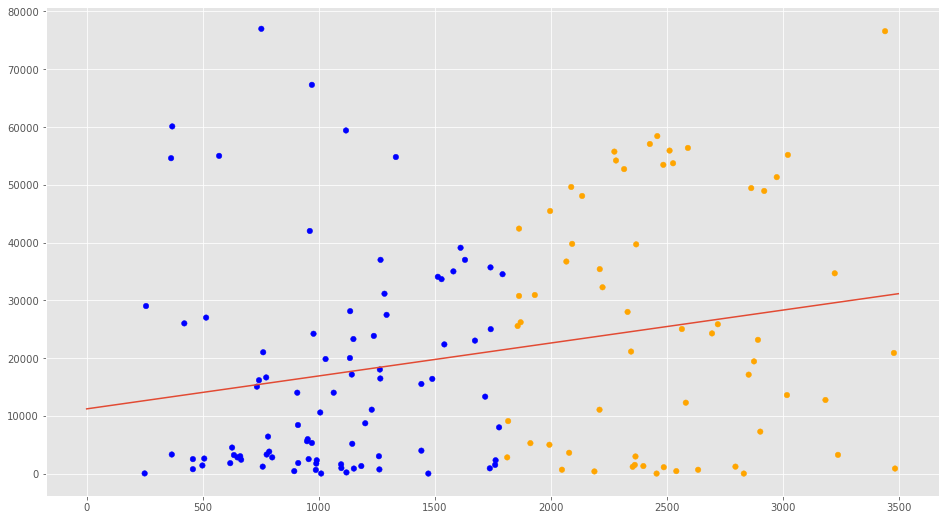

In [10]:
x = np.arange(3500)
y = x*5.69765366 + 11200.303223074163
plt.plot(x, y)

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

###  Predicción en regresión lineal simple

In [11]:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


# Regresión con Múltiples Variables

La ecuación de la recta pasa a ser $y = b + m_1 x_1 + m_2 x_2 +...+ m_n x_n$
y deja de ser una recta.

La primera variable seguirá siendo la cantidad de palabras y la segunda variable será la suma de 3 columnas de entrada:
la cantidad de enlaces, comentarios y cantidad de imágenes.

In [12]:
suma = (datos_filtrados["# of Links"] + datos_filtrados['# of comments'].fillna(0) + datos_filtrados['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = datos_filtrados["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = datos_filtrados['# Shares'].values
 

Se crea un nuevo objeto de de regresión lineal con SKLearn

In [13]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Con esta variable mas el modelo sigue siendo pesimo

C:\Users\osciv\AppData\Local\Temp/ipykernel_17384/615563843.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

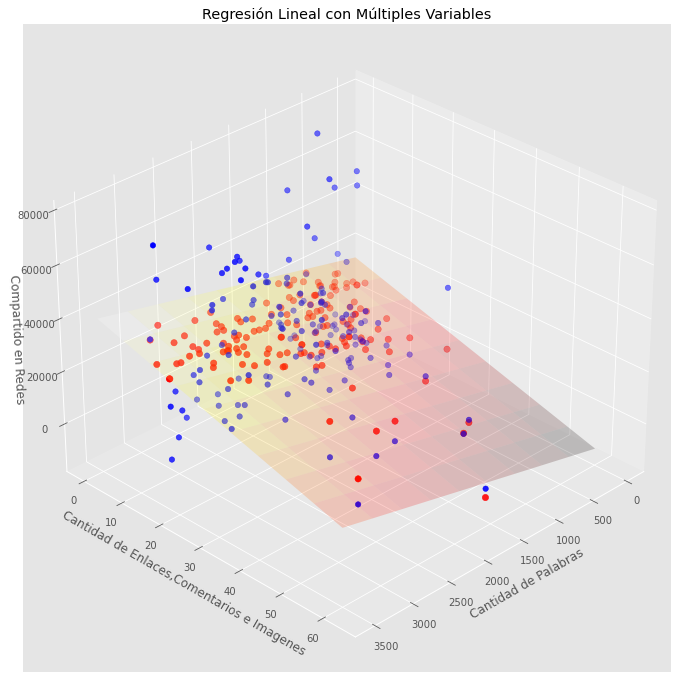

In [14]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=45)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

### Predicción con el modelo de Mútiples Variables

In [15]:
# Se quiere  predecir cuántos "Shares" se van a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:
 
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518
